In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/flip_data_cleaned.csv')
data.head()

,Unnamed: 0,brand,model,ram,storage,display size,display type,rear camera,front camera,price
0,0,realme,c53,6,64,6.74,HD,108,8,10999
1,2,vivo,t2x 5g,8,128,6.58,Full HD,50,8,15999
2,3,vivo,t2x 5g,6,128,6.58,Full HD,50,8,13999
3,7,vivo,t2x 5g,4,128,6.58,Full HD,50,8,12999
4,10,realme,11x 5g,6,128,6.72,Full HD,64,8,14999


In [47]:
data.drop(['Unnamed: 0', 'model'],axis=1, inplace=True)
data.head()

,brand,ram,storage,display size,display type,rear camera,front camera,price
0,realme,6,64,6.74,HD,108,8,10999
1,vivo,8,128,6.58,Full HD,50,8,15999
2,vivo,6,128,6.58,Full HD,50,8,13999
3,vivo,4,128,6.58,Full HD,50,8,12999
4,realme,6,128,6.72,Full HD,64,8,14999


In [48]:
data.shape

(598, 8)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()
data['brand'] = le.fit_transform(data['brand'])
data['display type'] = le.fit_transform(data['display type'])

In [51]:
data.head()

,brand,ram,storage,display size,display type,rear camera,front camera,price
0,8,6,64,6.74,2,108,8,10999
1,11,8,128,6.58,1,50,8,15999
2,11,6,128,6.58,1,50,8,13999
3,11,4,128,6.58,1,50,8,12999
4,8,6,128,6.72,1,64,8,14999


In [52]:
y = data['price']
x = data.drop(['price'], axis=1)

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [54]:
X_train, x_test, Y_train, y_test = train_test_split(x,y, test_size=0.16)

In [55]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
res = model.predict(x_test)
print(res[:5])

[28894.5        46244.5        15924.5        10462.66666667
 10199.        ]


In [56]:
print(r2_score(y_test, res))

0.8633343494082606


In [57]:
len(y_test)

96

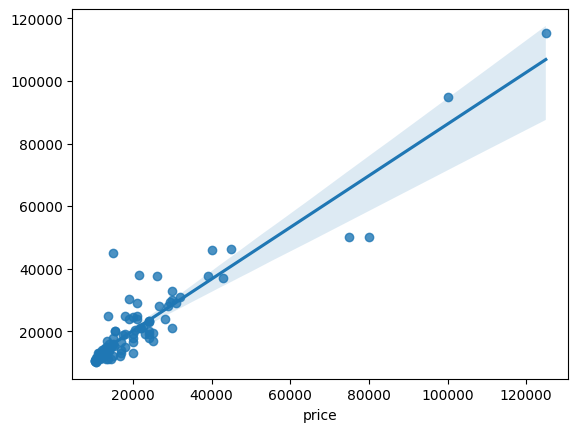

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.regplot(x=y_test, y=res)
plt.show()

In [59]:
import xgboost as xgb

In [60]:
model2 = xgb.XGBRegressor()
model2.fit(X_train, Y_train)
res2 = model2.predict(x_test)
print(res2[:5])

[27192.898 46014.91  15431.364 10428.245 10706.779]


In [61]:
print(r2_score(y_test, res2))

0.8548631635708774


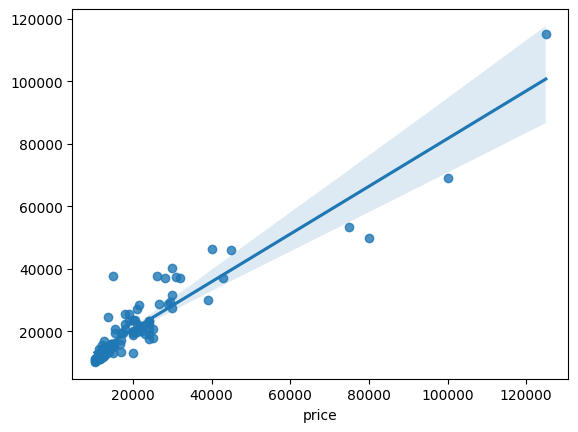

In [62]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
sns.regplot(x=y_test, y=res2)
plt.show()

We will try to compare different models and pick the best model using cross validation

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [35]:
params = {
    'SVR' : {'model':SVC(), 'params':{'C':[3,5,7]}},
    'XGBRegressor' : {'model': xgb.XGBRegressor(), 'params':{'n_estimators': [10, 20, 30, 50, 100, 1000], 'max_depth':[3, 5, 7]}},
    'DecisionTreeRegressor': {'model':DecisionTreeRegressor(), 'params':{'max_depth': [2, 5, 10]}}
}

In [36]:
gcv = []
for i in params:
  res = GridSearchCV(params[i]['model'], params[i]['params'], scoring='r2').fit(X_train, Y_train)
  gcv.append({'model':i, 'best params':res.best_params_, 'best score':res.best_score_})

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [37]:
gcv_df = pd.DataFrame(gcv)
gcv_df

,model,best params,best score
0,SVR,{'C': 5},0.206274
1,XGBRegressor,"{'max_depth': 3, 'n_estimators': 100}",0.771846
2,DecisionTreeRegressor,{'max_depth': 10},0.536076


As per the generated results, XGBRegressor is the best model that fits the data well.

In [69]:
final_model = xgb.XGBRegressor(n_estimators=100, max_depth=3)
final_model.fit(X_train, Y_train)
final_res = final_model.predict(x_test)
print(final_res[:5])

[24014.645 40808.09  13111.477 10966.051 10913.795]


In [71]:
print(r2_score(y_test, final_res))

0.9074717910913429


In [74]:
import pickle

In [76]:
with open('/content/drive/MyDrive/Colab Notebooks/flip_model.pkl', 'wb') as files:
    pickle.dump(final_model, files)